Create EDA using the data and make your model to predict RTLMP from the data

**In the data file timeseries_data.xlsx, you can find following timeseries (hourly):**  
  
RTLoad: ERCOT real-time hourly actual load  
WIND_RTI: ERCOT real-time hourly wind generation  
GENERATION_SOLAR_RT: ERCOT real-time solar generation  
RTLMP: ERCOT North hub real-time price

**Requirements:**  
  
Create Exploratory Data Analysis (EDA)  
Create forecast model to predict RTLMP (Real-Time Locational Marginal Prices)

In [4]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
%matplotlib inline
#pip install openpyxl

In [5]:
df3 = pd.read_excel('D:/Git_Desk/data_works/Guzman Project/Assignment 3 - timeseries_data.xlsx')
#df3 = pd.read_excel('C:/Users/DanielS/Desktop/GitHub_Clone/data_works/Guzman Project/Assignment 3 - timeseries_data.xlsx')
df = df3.copy()
df

,DATETIME,HB_NORTH (RTLMP),ERCOT (WIND_RTI),ERCOT (GENERATION_SOLAR_RT),ERCOT (RTLOAD),HOURENDING,MARKETDAY,PEAKTYPE,MONTH,YEAR
0,2017-01-01 01:00:00,23.3575,2155.31,0.00,29485.791355,1,2017-01-01,OFFPEAK,JANUARY,2017
1,2017-01-01 02:00:00,21.4650,2313.81,0.00,28911.565913,2,2017-01-01,OFFPEAK,JANUARY,2017
2,2017-01-01 03:00:00,20.7350,2587.68,0.00,28238.258175,3,2017-01-01,OFFPEAK,JANUARY,2017
3,2017-01-01 04:00:00,20.2700,2748.65,0.00,27821.000513,4,2017-01-01,OFFPEAK,JANUARY,2017
4,2017-01-01 05:00:00,20.1200,2757.49,0.00,27646.942413,5,2017-01-01,OFFPEAK,JANUARY,2017
...,...,...,...,...,...,...,...,...,...,...
14982,2018-09-17 08:00:00,20.8600,3195.52,2.04,41902.240000,8,2018-09-17,WDPEAK,SEPTEMBER,2018
14983,2018-09-17 09:00:00,22.7675,2605.50,111.59,43014.370000,9,2018-09-17,WDPEAK,SEPTEMBER,2018
14984,2018-09-17 10:00:00,31.0600,2034.80,261.65,45782.550000,10,2018-09-17,WDPEAK,SEPTEMBER,2018
14985,2018-09-17 11:00:00,29.6700,NaN,464.88,49431.130000,11,2018-09-17,WDPEAK,SEPTEMBER,2018


### Exploratory Data Analysis (EDA)

In [6]:
missing_ob = df.isnull().sum()/ len(df) * 100 

print(missing_ob)

DATETIME                       0.000000
HB_NORTH (RTLMP)               0.000000
ERCOT (WIND_RTI)               0.033362
ERCOT (GENERATION_SOLAR_RT)    0.026690
ERCOT (RTLOAD)                 0.000000
HOURENDING                     0.000000
MARKETDAY                      0.000000
PEAKTYPE                       0.000000
MONTH                          0.000000
YEAR                           0.000000
dtype: float64


All categories have acceptable missing portion.

In [7]:
# Handle missing values
df = df.dropna() #6 of N/A vlaue are dropped.

In [8]:
#data cleaning
df.iloc[:,1:5].duplicated().sum()
df.describe()

,HB_NORTH (RTLMP),ERCOT (WIND_RTI),ERCOT (GENERATION_SOLAR_RT),ERCOT (RTLOAD),HOURENDING,YEAR
count,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000,14981.000000
mean,25.768281,7532.053149,291.997647,42372.917557,12.498765,2017.415460
std,46.370881,3992.742693,370.929008,9874.696215,6.921451,0.492818
min,-17.860000,54.440000,0.000000,25566.511248,1.000000,2017.000000
25%,18.042500,4134.730000,0.000000,35432.588663,7.000000,2017.000000
50%,20.057500,7281.370000,22.150000,39935.131628,12.000000,2017.000000
75%,25.030000,10851.640000,608.660000,47871.380668,18.000000,2018.000000
max,2809.357500,20350.400000,1257.540000,73264.662123,24.000000,2018.000000


Text(0.5, 1.0, 'RTLMP: ERCOT North hub real-time price')

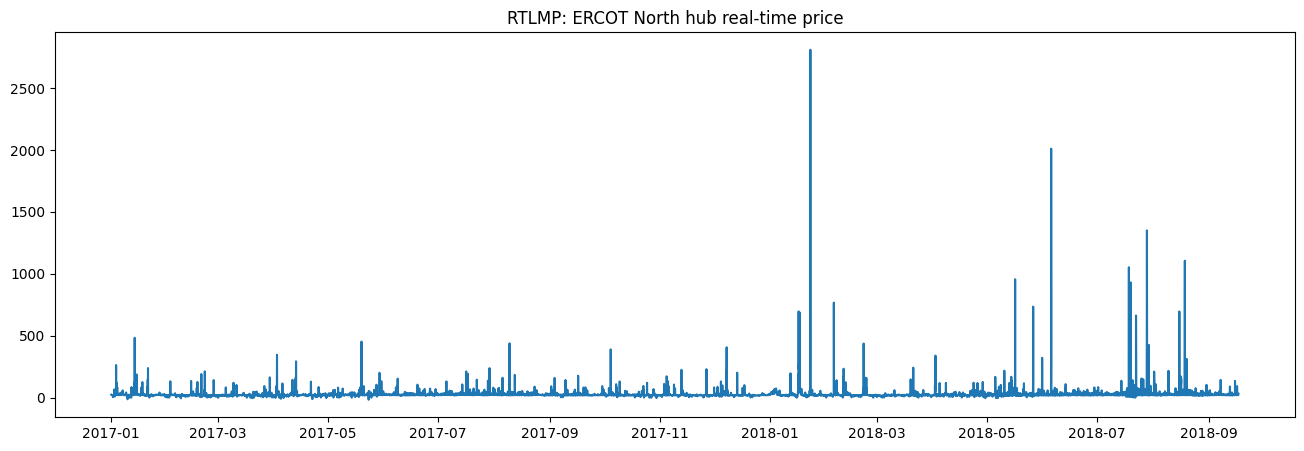

In [9]:
fig,ax = plt.subplots(figsize = (16, 5))
ax.plot(df['DATETIME'], df['HB_NORTH (RTLMP)'])
ax.set_title('RTLMP: ERCOT North hub real-time price')

In [10]:
#drop outliter
df = df[df['HB_NORTH (RTLMP)'] <= 500]
df.sort_values(by="HB_NORTH (RTLMP)", ascending=False)

,DATETIME,HB_NORTH (RTLMP),ERCOT (WIND_RTI),ERCOT (GENERATION_SOLAR_RT),ERCOT (RTLOAD),HOURENDING,MARKETDAY,PEAKTYPE,MONTH,YEAR
13623,2018-07-22 17:00:00,494.7975,3019.56,1133.62,70945.990785,17,2018-07-22,WEPEAK,JULY,2018
312,2017-01-14 01:00:00,482.9050,3393.45,0.11,33336.327325,1,2017-01-14,OFFPEAK,JANUARY,2017
3326,2017-05-19 16:00:00,452.2725,6048.78,658.84,53999.100555,16,2017-05-19,WDPEAK,MAY,2017
13765,2018-07-28 15:00:00,446.6000,2487.60,1210.72,65040.478428,15,2018-07-28,WEPEAK,JULY,2018
12493,2018-06-05 15:00:00,444.9850,2178.80,1218.70,63904.550605,15,2018-06-05,WDPEAK,JUNE,2018
...,...,...,...,...,...,...,...,...,...,...
2255,2017-04-05 01:00:00,-9.6625,11972.23,0.00,32575.858775,1,2017-04-05,OFFPEAK,APRIL,2017
218,2017-01-10 03:00:00,-11.4800,11570.82,0.11,28449.908768,3,2017-01-10,OFFPEAK,JANUARY,2017
2673,2017-04-22 11:00:00,-12.5300,11554.00,187.24,35664.608470,11,2017-04-22,WEPEAK,APRIL,2017
217,2017-01-10 02:00:00,-13.6075,11832.67,0.11,28994.028000,2,2017-01-10,OFFPEAK,JANUARY,2017


In [11]:
df.rename(columns={'HB_NORTH (RTLMP)': 'RTLMP', 
                        'ERCOT (WIND_RTI)': 'WIND_RTI', 
                        'ERCOT (GENERATION_SOLAR_RT)': 'GENERATION_SOLAR_RT', 
                        'ERCOT (RTLOAD)': 'RTLOAD'},  inplace=True)
df.head()

,DATETIME,RTLMP,WIND_RTI,GENERATION_SOLAR_RT,RTLOAD,HOURENDING,MARKETDAY,PEAKTYPE,MONTH,YEAR
0,2017-01-01 01:00:00,23.3575,2155.31,0.0,29485.791355,1,2017-01-01,OFFPEAK,JANUARY,2017
1,2017-01-01 02:00:00,21.4650,2313.81,0.0,28911.565913,2,2017-01-01,OFFPEAK,JANUARY,2017
2,2017-01-01 03:00:00,20.7350,2587.68,0.0,28238.258175,3,2017-01-01,OFFPEAK,JANUARY,2017
3,2017-01-01 04:00:00,20.2700,2748.65,0.0,27821.000513,4,2017-01-01,OFFPEAK,JANUARY,2017
4,2017-01-01 05:00:00,20.1200,2757.49,0.0,27646.942413,5,2017-01-01,OFFPEAK,JANUARY,2017


In [12]:
def plot_series(df=None, column=None, series=pd.Series([]), 
                label=None, ylabel=None, title=None, start=0, end=None):
    sns.set()
    fig, ax = plt.subplots(figsize=(30, 12))
    ax.set_xlabel('Time', fontsize=16)
    if column:
        ax.plot(df[column][start:end], label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if series.any():
        ax.plot(series, label=label)
        ax.set_ylabel(ylabel, fontsize=16)
    if label:
        ax.legend(fontsize=16)
    if title:
        ax.set_title(title, fontsize=24)
    ax.grid(True)
    return ax

C:\Users\suisx\AppData\Local\Temp\ipykernel_7652\1031602474.py:1: FutureWarning: The default dtype for empty Series will be 'object' instead of 'float64' in a future version. Specify a dtype explicitly to silence this warning.
  def plot_series(df=None, column=None, series=pd.Series([]),


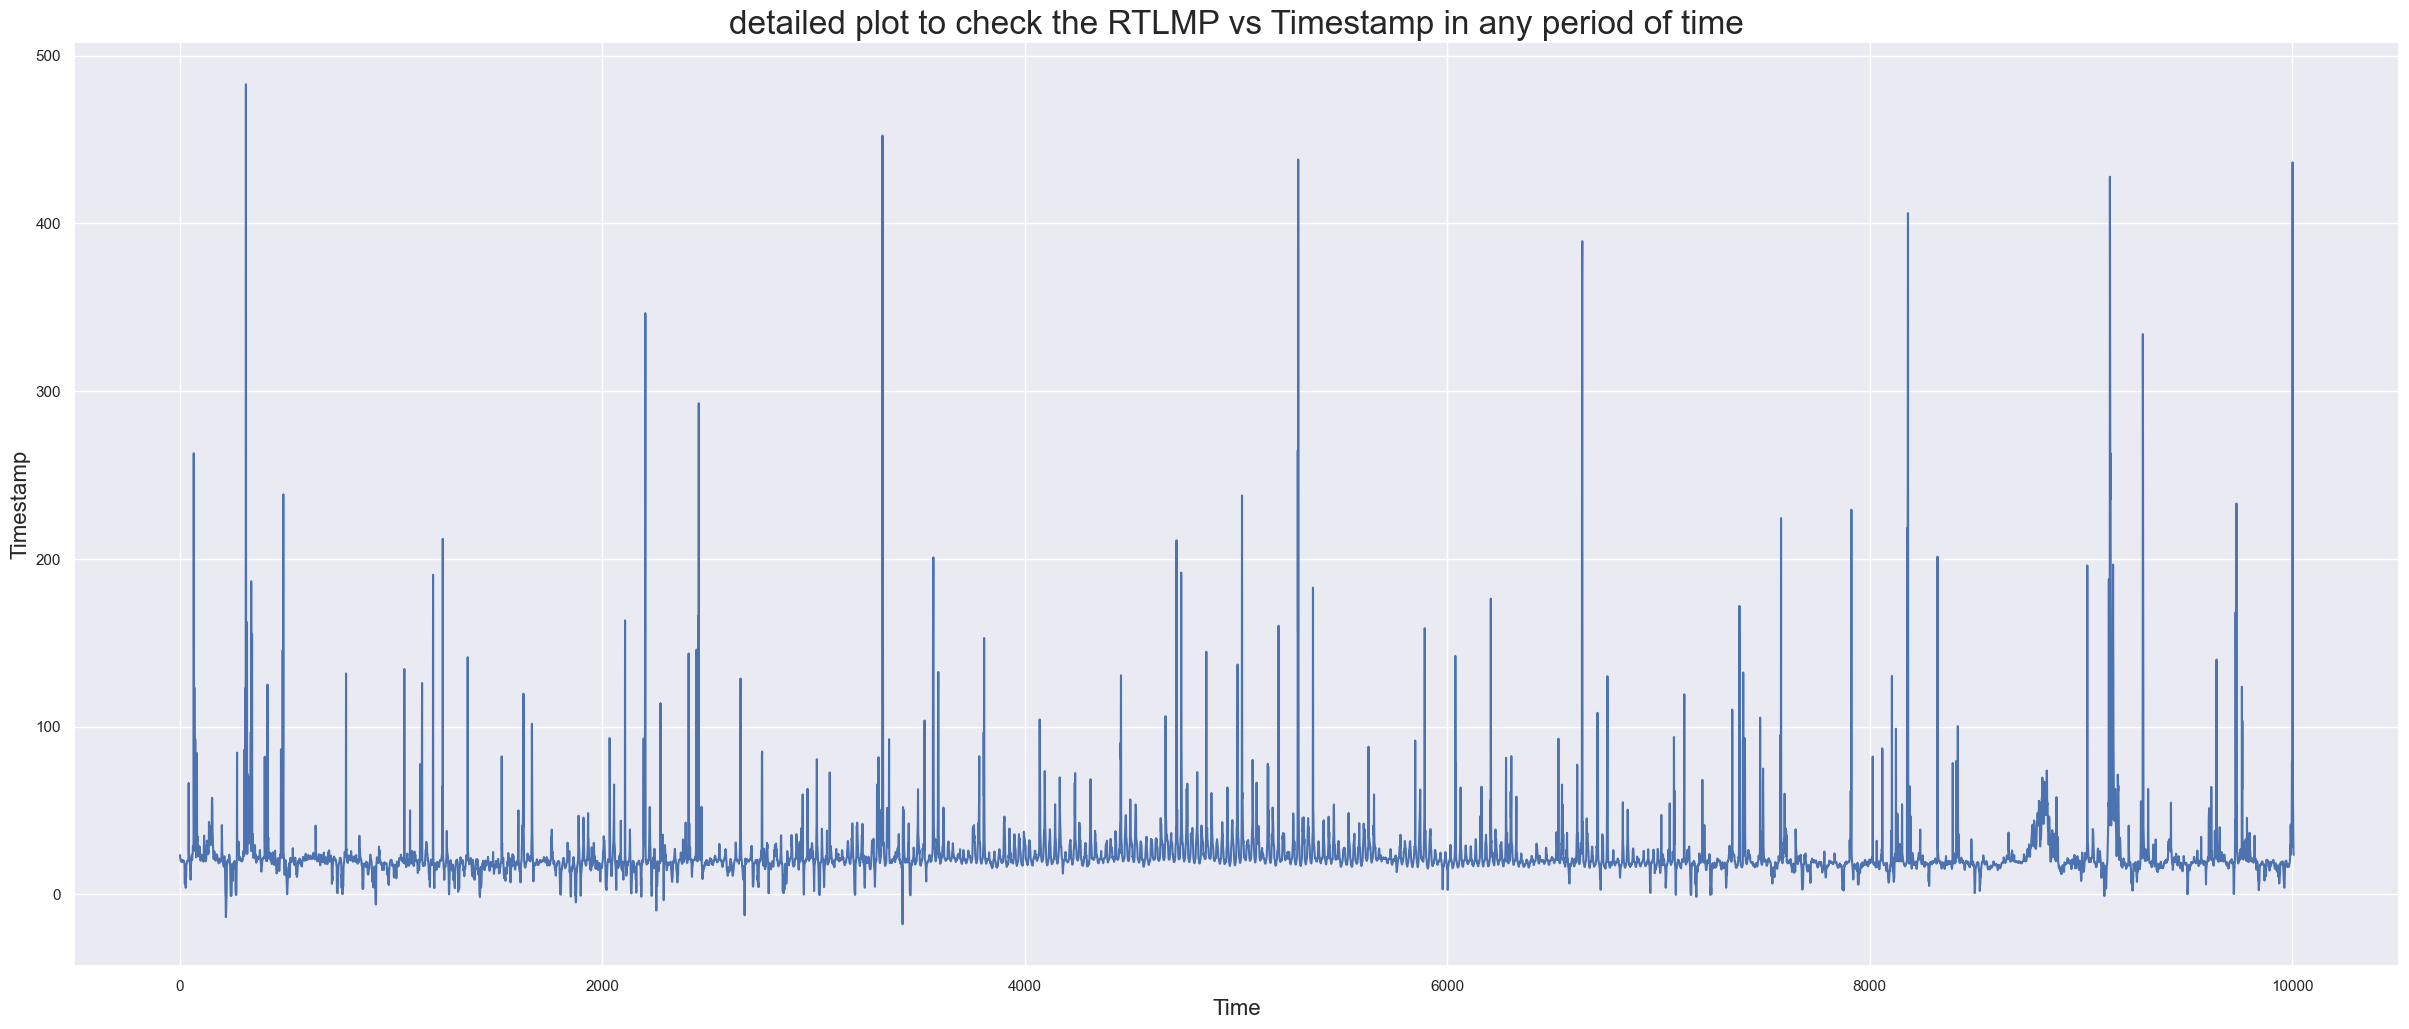

In [13]:
ax = plot_series(df=df, column='RTLMP', ylabel='Timestamp',
                 title='detailed plot to check the RTLMP vs Timestamp in any period of time', end=10000)
plt.show()

# Improvement of Prediction and analysis

In [14]:
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [15]:
#turn datetime to a continuous variable:
df['Timestamp'] = (df['DATETIME'] - pd.Timestamp("2017-01-01 00:00:00")) // pd.Timedelta('1h')
df.drop(['DATETIME', 'MARKETDAY'], axis=1, inplace=True)
df.tail(5)

,RTLMP,WIND_RTI,GENERATION_SOLAR_RT,RTLOAD,HOURENDING,PEAKTYPE,MONTH,YEAR,Timestamp
14980,20.3950,3094.87,0.00,37923.34,6,OFFPEAK,SEPTEMBER,2018,14982
14981,20.8800,3325.27,0.00,40936.18,7,WDPEAK,SEPTEMBER,2018,14983
14982,20.8600,3195.52,2.04,41902.24,8,WDPEAK,SEPTEMBER,2018,14984
14983,22.7675,2605.50,111.59,43014.37,9,WDPEAK,SEPTEMBER,2018,14985
14984,31.0600,2034.80,261.65,45782.55,10,WDPEAK,SEPTEMBER,2018,14986


In [16]:
from sklearn import preprocessing

#replace the Peaktype by value
df['PEAKTYPE'] = df['PEAKTYPE'].replace({'OFFPEAK': 0, 'WEPEAK': 2, 'WDPEAK': 4})
# rescale the data for the better predictions:
drop_list=["RTLMP", "HOURENDING", "MONTH", "YEAR"]

#spliting data prepare
y = pd.DataFrame(df["RTLMP"])
X = df.drop([col for col in drop_list if col in df], axis=1)

In [17]:
from statsmodels.tsa.arima.model import ARIMA
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn import preprocessing

In [18]:
def split_train_test(X, y, test_size):
    # Determine the index at which to split the data
    split_index = int(len(X) * (1 - test_size))
    
    # Split the data into training and test sets
    X_train, X_test = X[:split_index], X[split_index:]
    y_train, y_test = y[:split_index], y[split_index:]
    
    return X_train, X_test, y_train, y_test

# Split the X and y data into train and test sets
X_train, X_test, y_train, y_test = split_train_test(X, y, test_size=0.05)

# Print the shapes of the resulting datasets
print("X_train shape:", X_train.shape)
print("X_test shape:", X_test.shape)
print("y_train shape:", y_train.shape)
print("y_test shape:", y_test.shape)

unique_classes = np.unique(y_train)
num_classes = len(unique_classes)
print(f'Number of classes: {num_classes}')

X_train shape: (14212, 5)
X_test shape: (748, 5)
y_train shape: (14212, 1)
y_test shape: (748, 1)
Number of classes: 7101


In [19]:
# Use transformed data with a model:
from sklearn.linear_model import Ridge
from sklearn.model_selection import train_test_split

scaler = preprocessing.MinMaxScaler()
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)
ridge = Ridge().fit(X_train_scaled, y_train)
X_test_scaled = scaler.transform(X_test)
ridge.score(X_test_scaled, y_test)

0.2619291281366203

In [20]:
import numpy as np
unique_classes = np.unique(y_train)
num_classes = len(unique_classes)
print(f'Number of classes: {num_classes}')


Number of classes: 7101


In [ ]:
#MinMax Scaler

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD
from keras.utils import to_categorical

# number of classes:
#num_classes = 6227
num_classes = 7101

# one-hot vectors
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

model = Sequential()

# Input layer
model.add(Dense(32, activation='relu', input_shape=(5,)))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.01),  # note the change to `learning_rate` from `lr`
              metrics=['accuracy'])

# fit the model to the training data
model.fit(X_train_scaled, y_train_categorical, epochs=50, batch_size=32)

# evaluate the model on the test data
score = model.evaluate(X_test_scaled, y_test_categorical)

print(score)

Epoch 1/50
445/445 [==============================] - 4s 6ms/step - loss: 8.4710 - accuracy: 0.1268
Epoch 2/50
445/445 [==============================] - 3s 6ms/step - loss: 4.1190 - accuracy: 0.1264
Epoch 3/50
445/445 [==============================] - 3s 6ms/step - loss: 3.5280 - accuracy: 0.1238
Epoch 4/50
445/445 [==============================] - 3s 6ms/step - loss: 3.4457 - accuracy: 0.1215
Epoch 5/50
445/445 [==============================] - 2s 4ms/step - loss: 3.4008 - accuracy: 0.1260
Epoch 6/50
445/445 [==============================] - 2s 5ms/step - loss: 3.3592 - accuracy: 0.1283
Epoch 7/50
445/445 [==============================] - 2s 5ms/step - loss: 3.3107 - accuracy: 0.1307
Epoch 8/50
445/445 [==============================] - 2s 5ms/step - loss: 3.2504 - accuracy: 0.1347
Epoch 9/50
445/445 [==============================] - 2s 5ms/step - loss: 3.1857 - accuracy: 0.1390
Epoch 10/50
445/445 [==============================] - 2s 5ms/step - loss: 3.1148 - accuracy: 0.1456

24/24 [==============================] - 0s 3ms/step


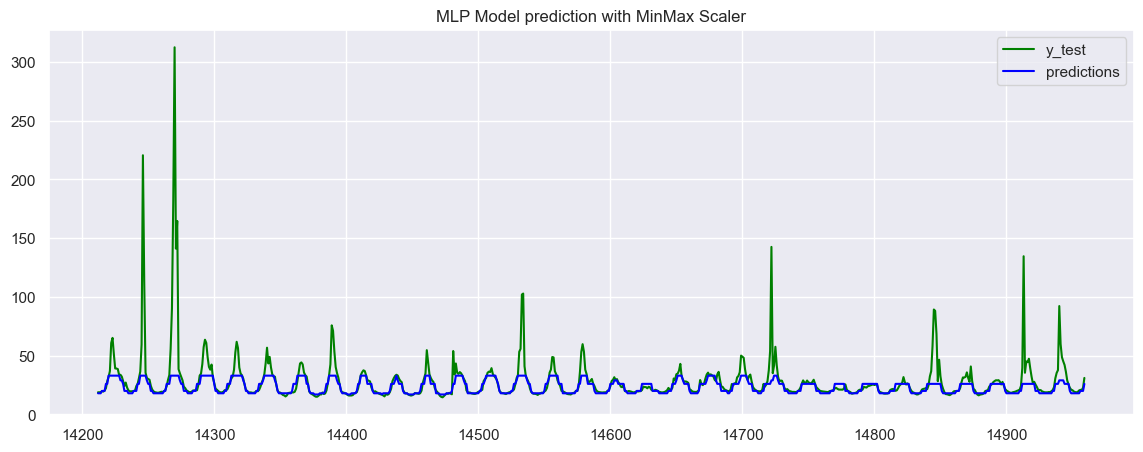

In [24]:
# predict with my model
y_pred = model.predict(X_test_scaled)

# turn categroy to labels
y_pred = np.argmax(y_pred, axis=1)

# plot
plt.figure(figsize=(14,5))

# plt y_test
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, color='green', label='y_test')

# plt y_pred
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_pred, color='blue', label='predictions')

plt.legend()
plt.title('MLP Model prediction with MinMax Scaler')
plt.show()


In [21]:
mse = mean_squared_error(y_test, y_pred)
mse

346.28972757352943

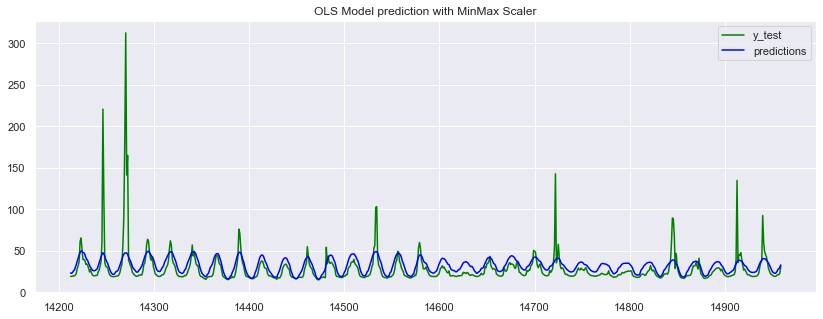

In [22]:
# Add a constant to the features
X_train_scaled_sm = sm.add_constant(X_train_scaled)
X_test_scaled_sm = sm.add_constant(X_test_scaled)

# Train the model
model = sm.OLS(y_train, X_train_scaled_sm)
results = model.fit()

# use the results object to make predictions
y_pred = results.predict(X_test_scaled_sm)

# Plotting the results
plt.figure(figsize=(14,5))

# Plotting the y_train
#plt.plot(range(len(y_train)), y_train, color='blue', label='y_train')

# Plotting the y_test
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, color='green', label='y_test')

# Plotting the predictions
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_pred, color='blue', label='predictions')

plt.legend()
plt.title('OLS Model prediction with MinMax Scaler')
plt.show()

In [23]:
mse = mean_squared_error(y_test, y_pred)
mse

300.3546022247436

In [24]:
# standardize by X data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_scaled

,WIND_RTI,GENERATION_SOLAR_RT,RTLOAD,PEAKTYPE,Timestamp
0,0.072430,-0.786106,0.061176,-1.280515,1.734427
1,0.103283,-0.786106,0.007730,-1.280515,1.734670
2,0.030798,-0.786106,0.083961,-1.280515,1.734913
3,-0.001440,-0.786106,0.288231,0.980612,1.735157
4,-0.073561,-0.690816,0.353793,0.980612,1.735400
...,...,...,...,...,...
743,-1.137123,-0.786106,-0.415193,-1.280515,1.916037
744,-1.079274,-0.786106,-0.104655,0.980612,1.916280
745,-1.111852,-0.780508,-0.005082,0.980612,1.916523
746,-1.259994,-0.479844,0.109547,0.980612,1.916767


In [25]:
import numpy as np
unique_classes = np.unique(y_train)
num_classes = len(unique_classes)
print(f'Number of classes: {num_classes}')

Number of classes: 7101


In [26]:
# number of classes:
num_classes = 7101

# one-hot vectors
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

model = Sequential()

# Input layer
model.add(Dense(32, activation='relu', input_shape=(5,)))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.01),  # note the change to `learning_rate` from `lr`
              metrics=['accuracy'])

# fit the model to the training data
model.fit(X_train_scaled, y_train_categorical, epochs=50, batch_size=32)

# evaluate the model on the test data
score = model.evaluate(X_test_scaled, y_test_categorical)

print(score)


Epoch 1/50
445/445 [==============================] - 3s 6ms/step - loss: 7.7483 - accuracy: 0.1278
Epoch 2/50
445/445 [==============================] - 3s 7ms/step - loss: 3.7672 - accuracy: 0.1350
Epoch 3/50
445/445 [==============================] - 6s 13ms/step - loss: 3.3011 - accuracy: 0.1476
Epoch 4/50
445/445 [==============================] - 6s 13ms/step - loss: 3.1068 - accuracy: 0.1661
Epoch 5/50
445/445 [==============================] - 3s 6ms/step - loss: 2.9779 - accuracy: 0.1786
Epoch 6/50
445/445 [==============================] - 4s 10ms/step - loss: 2.8926 - accuracy: 0.1881
Epoch 7/50
445/445 [==============================] - 4s 8ms/step - loss: 2.8340 - accuracy: 0.1935
Epoch 8/50
445/445 [==============================] - 2s 5ms/step - loss: 2.7877 - accuracy: 0.1991
Epoch 9/50
445/445 [==============================] - 2s 5ms/step - loss: 2.7578 - accuracy: 0.1979
Epoch 10/50
445/445 [==============================] - 3s 6ms/step - loss: 2.7293 - accuracy: 0.2

24/24 [==============================] - 0s 3ms/step


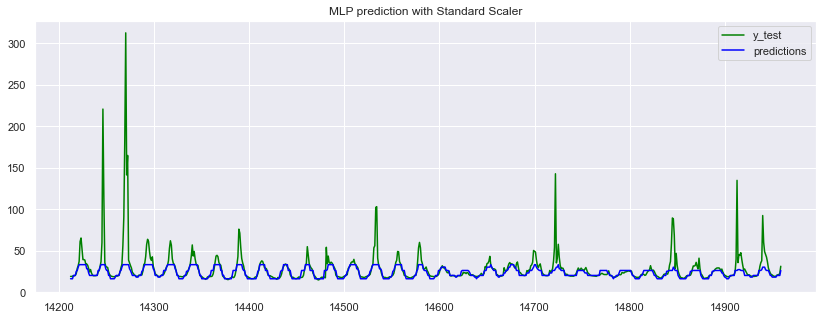

In [27]:
# predict using my model
y_pred = model.predict(X_test_scaled)

# turn categroy vectors to labels
y_pred = np.argmax(y_pred, axis=1)

# plotting
plt.figure(figsize=(14,5))

# plt y_test
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, color='green', label='y_test')

# plt y_pred
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_pred, color='blue', label='predictions')

plt.legend()
plt.title('MLP prediction with Standard Scaler')
plt.show()


In [28]:
mse = mean_squared_error(y_test, y_pred)
mse

338.621719552139

C:\Apps\anaconda\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


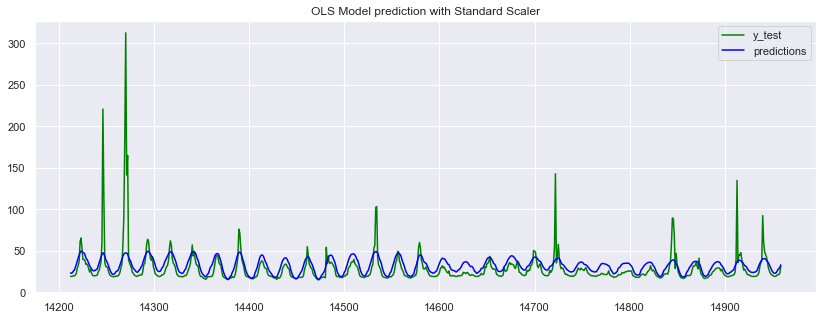

In [29]:
# OLS Model using Standard Scaler:


# Add a constant to the features
X_train_scaled_sm = sm.add_constant(X_train_scaled)
X_test_scaled_sm = sm.add_constant(X_test_scaled)

# Train the model
model = sm.OLS(y_train, X_train_scaled_sm)
results = model.fit()

# Now you can use the results object to make predictions
y_pred = results.predict(X_test_scaled_sm)

# Plotting the results
plt.figure(figsize=(14,5))

# Plotting the y_train
#plt.plot(range(len(y_train)), y_train, color='blue', label='y_train')

# Plotting the y_test
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, color='green', label='y_test')

# Plotting the predictions
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_pred, color='blue', label='predictions')

plt.legend()
plt.title('OLS Model prediction with Standard Scaler')
plt.show()

In [30]:
mse = mean_squared_error(y_test, y_pred)
mse

300.3546022247436

In [32]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.optimizers import SGD, Adam, RMSprop
from keras.utils import to_categorical

# define your set of parameters
optimizers = [SGD, Adam, RMSprop]
learning_rates = [0.01, 0.001, 0.0001]
hidden_layers = [2, 3, 4]
epochs = [20, 30, 50]

best_score = 0
best_params = {}

for opt in optimizers:
    for lr in learning_rates:
        for layers in hidden_layers:
            for epoch in epochs:
                print(f"Training with optimizer={opt}, learning_rate={lr}, hidden_layers={layers}, epochs={epoch}")

                model = Sequential()

                # Input layer
                model.add(Dense(32, activation='relu', input_shape=(5,)))

                # Hidden layers
                for _ in range(layers):
                    model.add(Dense(64, activation='relu'))

                # Output layer
                model.add(Dense(num_classes, activation='softmax'))

                # compile the model
                model.compile(loss='categorical_crossentropy',
                              optimizer=opt(learning_rate=lr),  
                              metrics=['accuracy'])

                # fit the model to the training data
                model.fit(X_train_scaled, y_train_categorical, epochs=epoch, batch_size=32)

                # evaluate the model on the test data
                score = model.evaluate(X_test_scaled, y_test_categorical)

                print(f"Score: {score[1]}")  # Use score[1] to access accuracy
                
                if score[1] > best_score:   # Compare the accuracy, not the entire list
                    best_score = score[1]
                    best_params = {"optimizer": opt, "learning_rate": lr, "hidden_layers": layers, "epochs": epoch}

print(f"Best score: {best_score} with parameters {best_params}")


Training with optimizer=<class 'keras.optimizers.sgd.SGD'>, learning_rate=0.01, hidden_layers=2, epochs=20
Epoch 1/20
445/445 [==============================] - 2s 4ms/step - loss: 7.8312 - accuracy: 0.1251
Epoch 2/20
445/445 [==============================] - 2s 4ms/step - loss: 3.8119 - accuracy: 0.1283
Epoch 3/20
445/445 [==============================] - 2s 4ms/step - loss: 3.3625 - accuracy: 0.1423
Epoch 4/20
445/445 [==============================] - 2s 4ms/step - loss: 3.1697 - accuracy: 0.1550
Epoch 5/20
445/445 [==============================] - 2s 4ms/step - loss: 3.0203 - accuracy: 0.1721
Epoch 6/20
445/445 [==============================] - 2s 4ms/step - loss: 2.9196 - accuracy: 0.1841
Epoch 7/20
445/445 [==============================] - 2s 4ms/step - loss: 2.8546 - accuracy: 0.1917
Epoch 8/20
445/445 [==============================] - 2s 4ms/step - loss: 2.8087 - accuracy: 0.1941
Epoch 9/20
445/445 [==============================] - 2s 4ms/step - loss: 2.7708 - accuracy: 

Epoch 1/50
445/445 [==============================] - 5s 9ms/step - loss: 8.4280 - accuracy: 0.1219
Epoch 2/50
445/445 [==============================] - 6s 13ms/step - loss: 3.9241 - accuracy: 0.1286
Epoch 3/50
445/445 [==============================] - 7s 15ms/step - loss: 3.3900 - accuracy: 0.1283
Epoch 4/50
445/445 [==============================] - 6s 14ms/step - loss: 3.2425 - accuracy: 0.1401
Epoch 5/50
445/445 [==============================] - 7s 15ms/step - loss: 3.0568 - accuracy: 0.1604
Epoch 6/50
445/445 [==============================] - 7s 15ms/step - loss: 2.9106 - accuracy: 0.1747
Epoch 7/50
445/445 [==============================] - 7s 15ms/step - loss: 2.8283 - accuracy: 0.1886
Epoch 8/50
445/445 [==============================] - 3s 8ms/step - loss: 2.7812 - accuracy: 0.1921
Epoch 9/50
445/445 [==============================] - 2s 5ms/step - loss: 2.7499 - accuracy: 0.1933
Epoch 10/50
445/445 [==============================] - 2s 5ms/step - loss: 2.7235 - accuracy: 

KeyboardInterrupt: 

In [33]:
best_score

0.24732621014118195

In [34]:
best_params

{'optimizer': keras.optimizers.sgd.SGD,
 'learning_rate': 0.01,
 'hidden_layers': 4,
 'epochs': 20}

Epoch 1/20
445/445 [==============================] - 2s 4ms/step - loss: 7.6539 - accuracy: 0.1224
Epoch 2/20
445/445 [==============================] - 2s 4ms/step - loss: 3.5558 - accuracy: 0.1231
Epoch 3/20
445/445 [==============================] - 2s 4ms/step - loss: 3.3492 - accuracy: 0.1348
Epoch 4/20
445/445 [==============================] - 2s 4ms/step - loss: 3.1854 - accuracy: 0.1533
Epoch 5/20
445/445 [==============================] - 2s 4ms/step - loss: 2.9955 - accuracy: 0.1667
Epoch 6/20
445/445 [==============================] - 2s 4ms/step - loss: 2.8736 - accuracy: 0.1796
Epoch 7/20
445/445 [==============================] - 2s 4ms/step - loss: 2.8028 - accuracy: 0.1901
Epoch 8/20
445/445 [==============================] - 2s 4ms/step - loss: 2.7676 - accuracy: 0.1918
Epoch 9/20
445/445 [==============================] - 2s 4ms/step - loss: 2.7388 - accuracy: 0.1961
Epoch 10/20
445/445 [==============================] - 2s 4ms/step - loss: 2.7179 - accuracy: 0.2003

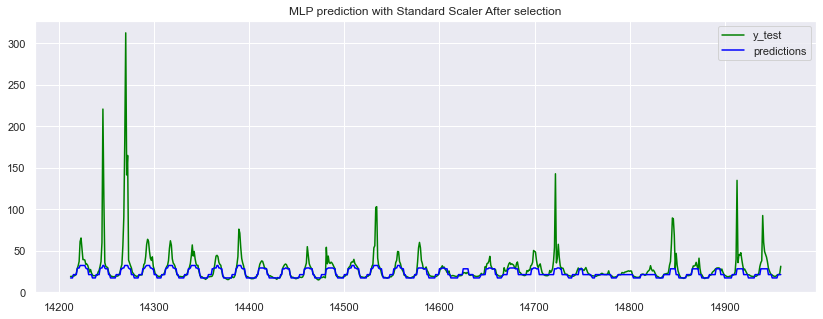

In [35]:
# standardize by X data
scaler = preprocessing.StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)
X_test_scaled = pd.DataFrame(X_test_scaled, columns=X.columns)
X_test_scaled

# number of classes:
num_classes = 7101

# one-hot vectors
y_train_categorical = to_categorical(y_train, num_classes=num_classes)
y_test_categorical = to_categorical(y_test, num_classes=num_classes)

model = Sequential()

# Input layer
model.add(Dense(32, activation='relu', input_shape=(5,)))

# Hidden layers
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(64, activation='relu'))

# Output layer
model.add(Dense(num_classes, activation='softmax'))

# compile the model
model.compile(loss='categorical_crossentropy',
              optimizer=SGD(learning_rate=0.01),  # note the change to `learning_rate` from `lr`
              metrics=['accuracy'])

# fit the model to the training data
model.fit(X_train_scaled, y_train_categorical, epochs=20, batch_size=32)

# predict using my model
y_pred = model.predict(X_test_scaled)

# turn categroy vectors to labels
y_pred = np.argmax(y_pred, axis=1)

# plotting
plt.figure(figsize=(14,5))

# plt y_test
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_test, color='green', label='y_test')

# plt y_pred
plt.plot(range(len(y_train), len(y_train) + len(y_test)), y_pred, color='blue', label='predictions')

plt.legend()
plt.title('MLP prediction with Standard Scaler After selection')
plt.show()